# Building Height Estimator (CNN Regression Model) 
<hr/>

Centre Name: **TBD** <br>
Institute Number: **Tata Institute of Social Sciences, Hyderabad Campus** <br>
Creators: **Dr. Dipak Samal and Raunit Singh** <br> 
<hr/>

## Project  Overview  
### Objectives

1. **Data Collection**: Gather data of builing footprints and building heights

1. **Data Preprocessing**: Clean and preprocess the collected data to make it suitable for model training. 

1. **Model Development**: Develop a regression model using appropriate machine learning algorithms. The model should be able to predict the height of a building based on the selected features.

1. **Model Evaluation**: Evaluate the performance of the model using suitable metrics. This will help in understanding the accuracy of the model and its ability to generalize on unseen data.

1. **Documentation**: Document all the steps, methodologies, and findings of the project. This will serve as a reference for future projects and for stakeholders to understand the work done.

1. **Future Scope**: Identify areas for future improvement and expansion of the project. This could include incorporating additional features, refining the model, or adapting the model to predict other building characteristics.



### Problem Defination
Sure, here's the problem definition for your project:

- **Problem**: The height of buildings is a crucial factor in urban planning, disaster management, and real estate valuation. However, obtaining accurate and up-to-date information about building heights can be challenging and time-consuming.

- **Proposed Solution**: The project aims to develop a Building Height Regression Model that can predict the height of a building based on two parameters building footprint and a satellite image of an area around the building. This model will serve as a tool to estimate building heights quickly and accurately, thereby aiding in efficient urban planning and development.

- **Data Requirements**: The model will require data related to buildings, [Microsoft Building Footprint Training Data with Heights](https://hub.arcgis.com/datasets/esri::microsoft-buildings-footprint-training-data-with-heights-/about) and Satellite imagary.

- **Expected Outcome**: The successful development of a regression model that can accurately predict building heights. This model will be a valuable tool for stakeholders such as urban planners, disaster management authorities, and real estate developers.

- **Future Scope**: The model developed through this project could be further refined or expanded to include additional features or to predict other building characteristics, thereby increasing its utility and applicability in the field of urban planning and development.


### Approach

1. **Data Collection**: Gather data related to buildings. Collect images of buildings from various angles and under different lighting conditions.

2. **Data Preprocessing**: Preprocess the data to make it suitable for training the CNN by resizing the images, normalizing the pixel values, and augmenting the dataset with transformations like rotation and flipping.

3. **Model Architecture**: Design the architecture of the CNN. This typically involves specifying the number and types of layers in the network. THe model will start with several convolutional and pooling layers to extract features from the images, followed by fully connected layers to make the final prediction. 

4. **Model Training**: Train the CNN on the preprocessed data. This involves feeding the data through the network, comparing the network's predictions to the true values using a loss function, and updating the network's weights using an optimization algorithm to minimize the loss.

5. **Model Evaluation**: Evaluate the performance of the trained CNN on a separate test set. This involves measuring how well the network's predictions match the true values using metrics such as Root Mean Squared Error (RMSE).

6. **Model Optimization**: If the performance of the CNN is not satisfactory, adjust the model's architecture or training procedure and repeat steps 4 and 5. This could involve changing the number of layers or neurons in the network, adjusting the learning rate of the optimization algorithm, or increasing the amount of training data.

7. **Model Deployment**: Once the CNN performs satisfactorily, deploy the model for use in predicting building heights. This involves saving the trained model and writing a function or API that takes in the necessary input data and returns the predicted building height.


### Sections
1. Project Overview
1. Libraries
    1. Geopandas
    1. Shapely
    1. Pnadas
    1. Seaborn
    1. Matplotlib
    1. os
    1. TensorFlow
    1. Keras
    1. Scikit-learn

1. Importing and cleaning Geodata
1. EDA
1. Model Development
1. Model Training
1. Model Testing

### Libraries

#### Importing the Libraries

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from PIL import Image
import os
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.metrics import R2Score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\Users\rauni\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.14.0


### Importing and Gcleaning Geodata

#### Importing the Geodata

In [2]:
shp=gpd.read_file("GeoData/Sample.shp")

In [3]:
shp

,OBJECTID,Height,Shape__Are,Shape__Len,geometry
0,6507078,14.58,164.996094,55.382713,"POLYGON Z ((-95.38073 29.75474 0.00000, -95.38..."
1,6507079,14.24,165.167969,55.400357,"POLYGON Z ((-95.38073 29.75459 0.00000, -95.38..."
2,6507080,15.54,151.699219,51.417825,"POLYGON Z ((-95.38083 29.75485 0.00000, -95.38..."
3,6507081,15.67,154.644531,52.059936,"POLYGON Z ((-95.38091 29.75472 0.00000, -95.38..."
4,6507082,13.58,166.265625,58.681031,"POLYGON Z ((-95.38113 29.75461 0.00000, -95.38..."
...,...,...,...,...,...
465942,5579765,20.48,139.128906,55.220550,"POLYGON Z ((-74.01515 40.69322 0.00000, -74.01..."
465943,5579766,23.86,321.769531,72.188952,"POLYGON Z ((-74.02200 40.68519 0.00000, -74.02..."
465944,5579767,10.35,128.324219,45.528611,"POLYGON Z ((-74.02181 40.68504 0.00000, -74.02..."
465945,5579768,12.35,533.003906,96.557174,"POLYGON Z ((-74.02424 40.68456 0.00000, -74.02..."


#### Reorganizing data as per model requirements 

In [4]:
df = shp[['OBJECTID','Height']].copy()
df

,OBJECTID,Height
0,6507078,14.58
1,6507079,14.24
2,6507080,15.54
3,6507081,15.67
4,6507082,13.58
...,...,...
465942,5579765,20.48
465943,5579766,23.86
465944,5579767,10.35
465945,5579768,12.35


In [5]:
import os
image_dir = 'final_imgs/'
image_files = os.listdir(image_dir)

df['image_path'] = ''
for index, row in df.iterrows():
    idno = row['OBJECTID']
    image_name = f'IMG-{idno}.png'
    if image_name in image_files:
        df.loc[index, 'image_path'] = os.path.join(image_dir, image_name)
fdf = df[df['image_path'] != ''].reset_index(drop=True)


In [6]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
fdf = swap_columns(fdf,"Height","image_path")
fdf

,OBJECTID,image_path,Height
0,6507293,final_imgs/IMG-6507293.png,16.77
1,6507294,final_imgs/IMG-6507294.png,17.07
2,6507295,final_imgs/IMG-6507295.png,13.36
3,6507296,final_imgs/IMG-6507296.png,15.91
4,6507297,final_imgs/IMG-6507297.png,15.98
...,...,...,...
22172,5579763,final_imgs/IMG-5579763.png,11.26
22173,5579764,final_imgs/IMG-5579764.png,20.51
22174,5579765,final_imgs/IMG-5579765.png,20.48
22175,5579768,final_imgs/IMG-5579768.png,12.35


In [7]:
fdf=fdf.drop(['OBJECTID'],axis=1)
fdf

,image_path,Height
0,final_imgs/IMG-6507293.png,16.77
1,final_imgs/IMG-6507294.png,17.07
2,final_imgs/IMG-6507295.png,13.36
3,final_imgs/IMG-6507296.png,15.91
4,final_imgs/IMG-6507297.png,15.98
...,...,...
22172,final_imgs/IMG-5579763.png,11.26
22173,final_imgs/IMG-5579764.png,20.51
22174,final_imgs/IMG-5579765.png,20.48
22175,final_imgs/IMG-5579768.png,12.35


In [1]:
# folder_path = 'Augmented_Images'
# x=os.listdir(folder_path)
# l=[]
# for i in x:
#     original_name = i.split('_')[0]
#     l.append(original_name)
# x=set(l)
# x.remove('Augmented')
# len(x)

In [ ]:
# l2=[]
# for i in df1['image_path']:
#     a = i.split('/')[1]
#     b=a.split('.')[0]
#     l2.append(b)

In [ ]:
# x = {item for item in x if item not in l2}

# len(x)  


In [ ]:
# len(fdf)

In [41]:
# test_df, validation_df = train_test_split(bdf, test_size=0.45, random_state=42)
# print(len(test_df))
# print(len(validation_df))

2686
2198


#### Importing Big Buildings data
Big Buildings data consits of satelitte images of about 50 buildings above 300m in height

In [9]:
df1=pd.read_csv('Big_Buildings.csv')
df1

,image_path,Height
0,final_imgs/IMG-8067493.png,587.400000
1,final_imgs/IMG-8067477.png,739.400000
2,final_imgs/IMG-8067476.png,530.000000
3,final_imgs/IMG-8067481.png,530.000000
4,final_imgs/IMG-8067478.png,530.000000
5,final_imgs/IMG-8067479.png,562.000000
6,final_imgs/IMG-8067480.png,520.910000
7,final_imgs/IMG-8067482.png,497.600000
8,final_imgs/IMG-8067483.png,479.830000
9,final_imgs/IMG-8067484.png,449.200000


### Merging Big Buildings Data 

In [10]:
fdf=pd.concat([fdf, df1], ignore_index=True)
fdf

,image_path,Height
0,final_imgs/IMG-6507293.png,16.77
1,final_imgs/IMG-6507294.png,17.07
2,final_imgs/IMG-6507295.png,13.36
3,final_imgs/IMG-6507296.png,15.91
4,final_imgs/IMG-6507297.png,15.98
...,...,...
22223,final_imgs/IMG-8067522.png,310.50
22224,final_imgs/IMG-8067523.png,360.10
22225,final_imgs/IMG-8067524.png,345.00
22226,final_imgs/IMG-8067525.png,528.00


### EDA

#### Checking Height Destribution  

In [14]:
fdf['Height'].describe()

count    22228.000000
mean        23.277215
std         33.689959
min          4.010000
25%         12.190000
50%         15.060000
75%         18.980000
max        739.400000
Name: Height, dtype: float64

Skewness: 6.4202378268558755


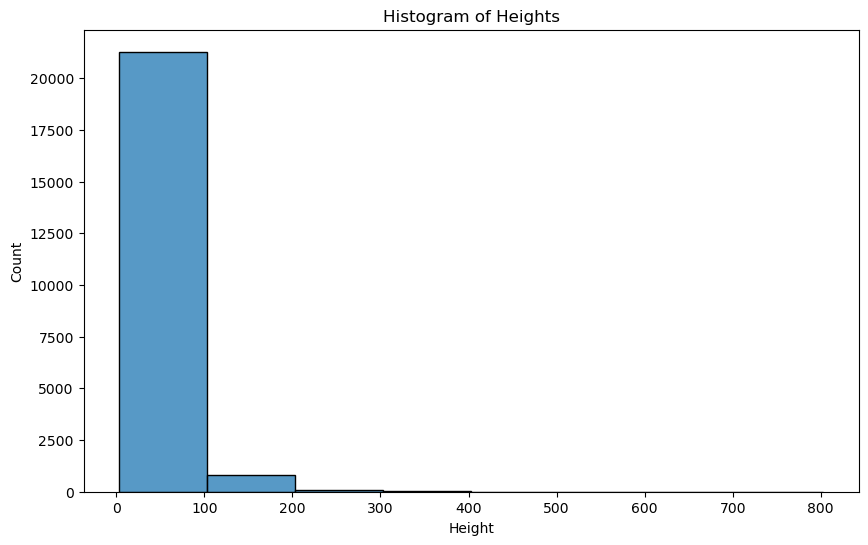

In [13]:
from scipy.stats import skew
data = fdf['Height']
skewness = skew(data)
print(f'Skewness: {skewness}')
bins = np.arange(data.min() - 1, data.max() + 100, 100)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, bins=bins)
plt.title('Histogram of Heights')
plt.show()


### Data Preprocessing

#### Normalizing Height Distribution

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
data = fdf[['Height']]
quantile_transformer = QuantileTransformer(output_distribution='normal')
fdf['adj_height'] = quantile_transformer.fit_transform(data)

#### Scaleing the Data

In [17]:
scaler = MinMaxScaler(feature_range=(1, 255))
adj_heights_scaled = scaler.fit_transform(fdf['adj_height'].values.reshape(-1, 1))
fdf['adj_heights_scaled'] = adj_heights_scaled
fdf

,image_path,Height,adj_height,adj_heights_scaled
0,final_imgs/IMG-6507293.png,16.77,0.295690,135.222584
1,final_imgs/IMG-6507294.png,17.07,0.354822,136.666956
2,final_imgs/IMG-6507295.png,13.36,-0.376283,118.808847
3,final_imgs/IMG-6507296.png,15.91,0.144780,131.536414
4,final_imgs/IMG-6507297.png,15.98,0.154930,131.784338
...,...,...,...,...
22223,final_imgs/IMG-8067522.png,310.50,2.878084,198.300614
22224,final_imgs/IMG-8067523.png,360.10,3.023137,201.843720
22225,final_imgs/IMG-8067524.png,345.00,2.972056,200.595996
22226,final_imgs/IMG-8067525.png,528.00,3.246912,207.309680


#### Checking New Destribution  

In [18]:
fdf['adj_heights_scaled'].describe()

count    22228.000000
mean       128.000193
std         24.417226
min          1.000000
25%        111.544017
50%        128.030644
75%        144.475214
max        255.000000
Name: adj_heights_scaled, dtype: float64

Skewness: 0.0006432651605186198


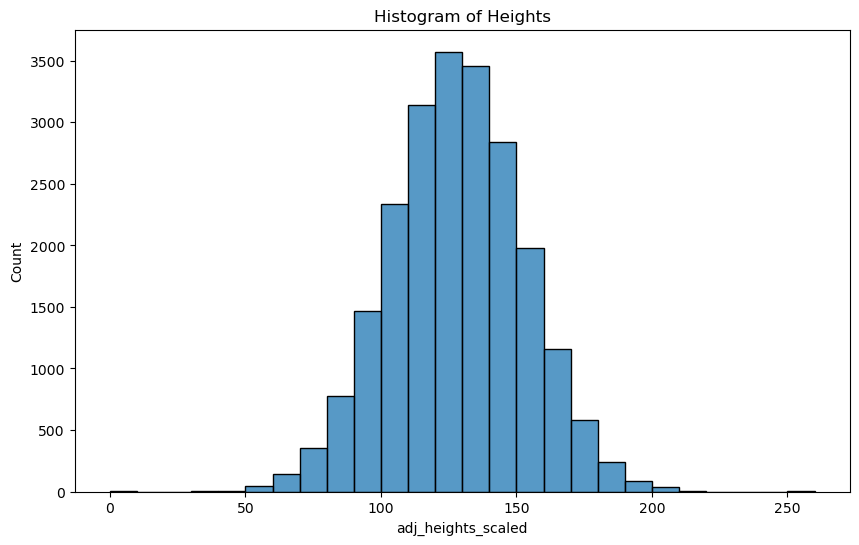

In [19]:
data = fdf['adj_heights_scaled']
skewness = skew(data)
print(f'Skewness: {skewness}')
bins = np.arange(data.min() - 1, data.max() + 10, 10)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, bins=bins)
plt.title('Histogram of Heights')
plt.show()

In [20]:
fdf=fdf.drop(['Height','adj_height'],axis=1)
fdf['Height']=fdf['adj_heights_scaled']
fdf=fdf.drop(['adj_heights_scaled'],axis=1)
fdf

,image_path,Height
0,final_imgs/IMG-6507293.png,135.222584
1,final_imgs/IMG-6507294.png,136.666956
2,final_imgs/IMG-6507295.png,118.808847
3,final_imgs/IMG-6507296.png,131.536414
4,final_imgs/IMG-6507297.png,131.784338
...,...,...
22223,final_imgs/IMG-8067522.png,198.300614
22224,final_imgs/IMG-8067523.png,201.843720
22225,final_imgs/IMG-8067524.png,200.595996
22226,final_imgs/IMG-8067525.png,207.309680


### Making adjustments to ensure big buildings data is part of training subset

In [21]:
subset = fdf.tail(51)  
fdf = fdf.iloc[:-51] 
fdf

,image_path,Height
0,final_imgs/IMG-6507293.png,135.222584
1,final_imgs/IMG-6507294.png,136.666956
2,final_imgs/IMG-6507295.png,118.808847
3,final_imgs/IMG-6507296.png,131.536414
4,final_imgs/IMG-6507297.png,131.784338
...,...,...
22172,final_imgs/IMG-5579763.png,104.515946
22173,final_imgs/IMG-5579764.png,148.935608
22174,final_imgs/IMG-5579765.png,148.861960
22175,final_imgs/IMG-5579768.png,112.567906


#### Splitting data into training and testing and validation

In [26]:
train_df, test_df = train_test_split(fdf, test_size=0.20, random_state=42)
train_df, Validation_df = train_test_split(train_df, test_size=0.20, random_state=42)

In [27]:
train_df

,image_path,Height
17934,final_imgs/IMG-1093942.png,145.828109
6544,final_imgs/IMG-6536817.png,118.874598
18328,final_imgs/IMG-1095313.png,157.354228
2294,final_imgs/IMG-6515651.png,114.360606
15885,final_imgs/IMG-5698522.png,128.459692
...,...,...
3875,final_imgs/IMG-6524223.png,132.873955
4582,final_imgs/IMG-6527615.png,124.277679
4301,final_imgs/IMG-6526074.png,109.931039
16113,final_imgs/IMG-5715572.png,163.464315


In [28]:
test_df

,image_path,Height
5466,final_imgs/IMG-6534417.png,112.380384
13871,final_imgs/IMG-5654926.png,156.890040
9400,final_imgs/IMG-2836738.png,120.562667
2115,final_imgs/IMG-6514690.png,133.500836
6628,final_imgs/IMG-6536901.png,95.783178
...,...,...
20138,final_imgs/IMG-5315994.png,154.861670
8045,final_imgs/IMG-6538666.png,95.112930
7409,final_imgs/IMG-6537710.png,135.887998
16381,final_imgs/IMG-5724204.png,154.531837


In [29]:
Validation_df

,image_path,Height
10847,final_imgs/IMG-2847939.png,112.154135
3174,final_imgs/IMG-6521820.png,105.188140
13276,final_imgs/IMG-5648874.png,140.999367
15634,final_imgs/IMG-5681285.png,131.013475
14680,final_imgs/IMG-5658683.png,130.270948
...,...,...
6858,final_imgs/IMG-6537131.png,141.567824
4381,final_imgs/IMG-6526154.png,134.734164
19660,final_imgs/IMG-5309065.png,149.396547
19974,final_imgs/IMG-5314731.png,154.885056


#### Merging big buildings data with training data

In [30]:
train_df=pd.concat([train_df, subset], ignore_index=True)
train_df

,image_path,Height
0,final_imgs/IMG-1093942.png,145.828109
1,final_imgs/IMG-6536817.png,118.874598
2,final_imgs/IMG-1095313.png,157.354228
3,final_imgs/IMG-6515651.png,114.360606
4,final_imgs/IMG-5698522.png,128.459692
...,...,...
14238,final_imgs/IMG-8067522.png,198.300614
14239,final_imgs/IMG-8067523.png,201.843720
14240,final_imgs/IMG-8067524.png,200.595996
14241,final_imgs/IMG-8067525.png,207.309680


#### CHecking distribution of Training Data

Skewness: 0.0382518333030751


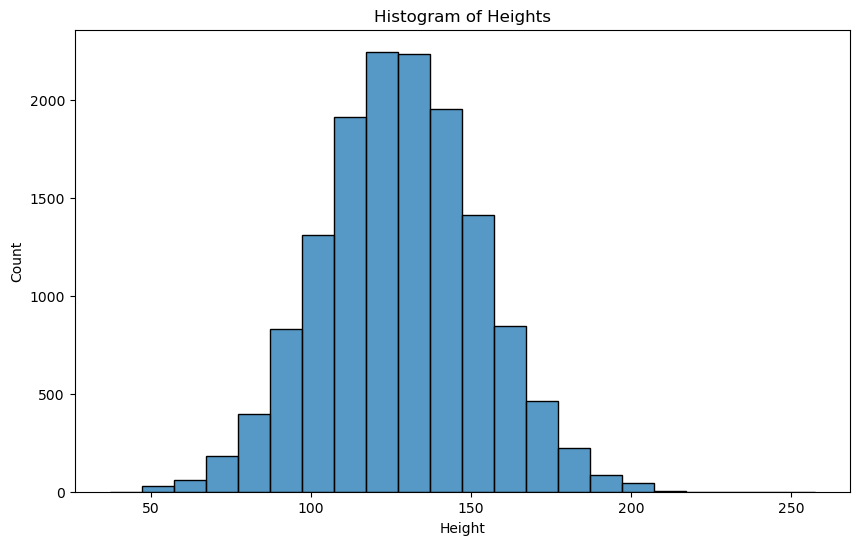

In [31]:
data = train_df['Height']
skewness = skew(data)
print(f'Skewness: {skewness}')
bins = np.arange(data.min() - 1, data.max() + 10, 10)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, bins=bins)
plt.title('Histogram of Heights')
plt.show()


#### Making sure augmentation folder is empty

In [32]:
folder_path = 'Augmented_Images'
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path) 
        elif os.path.isdir(file_path):
            os.rmdir(file_path) 
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')


#### Performing data augmentation on data to increase the volume of the data 

In [33]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=300,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
for index, row in train_df.iterrows():
    img = Image.open(row['image_path'])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    original_name = os.path.splitext(os.path.basename(row['image_path']))[0]
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='Augmented_Images', save_prefix=original_name+'_', 
                              save_format='png'):
        i += 1
        if i > 20:
            break  




In [43]:
new_images = os.listdir('Augmented_Images')
i=0
for image in new_images:
    original_name = image.split('_')[0]
    filtered_df = train_df[train_df['image_path'].str.contains(original_name)]
    if not filtered_df.empty:
        original_height = filtered_df['Height'].values[0]
        new_row = pd.DataFrame({'image_path': ['Augmented_Images/' + image], 
                                'Height': [original_height]})
        train_df = pd.concat([train_df, new_row], ignore_index=True)
        i+=1
        if i % 10000 == 0: 
            print(i)
    else:
        print(f"No match found for image: {image}")

train_df.to_csv('Augmented_Images/Augmented_Images.csv', index=False)


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000


#### Importing Augmented Big Buildings data 

In [44]:
train_df=pd.read_csv('Augmented_Images/Augmented_Images.csv')
train_df=train_df.sample(frac = 1)
train_df

,image_path,Height
291625,Augmented_Images/IMG-6537374__0_9492.png,131.103407
269974,Augmented_Images/IMG-6534402__0_1350.png,112.002545
236084,Augmented_Images/IMG-6519879__0_8734.png,129.195606
208660,Augmented_Images/IMG-6510529__0_5886.png,82.424345
171355,Augmented_Images/IMG-5658684__0_5772.png,167.573207
...,...,...
77534,Augmented_Images/IMG-2844321__0_3362.png,101.183836
85549,Augmented_Images/IMG-2848066__0_4645.png,128.742869
288719,Augmented_Images/IMG-6537156__0_6802.png,90.306231
219984,Augmented_Images/IMG-6513109__0_2860.png,136.536538


#### EDA of Training Data

In [45]:
train_df['Height'].describe()

count    313068.000000
mean        128.136068
std          24.717387
min          38.326242
25%         111.544017
50%         127.969356
75%         144.687430
max         255.000000
Name: Height, dtype: float64

Skewness: 0.03845922409252713


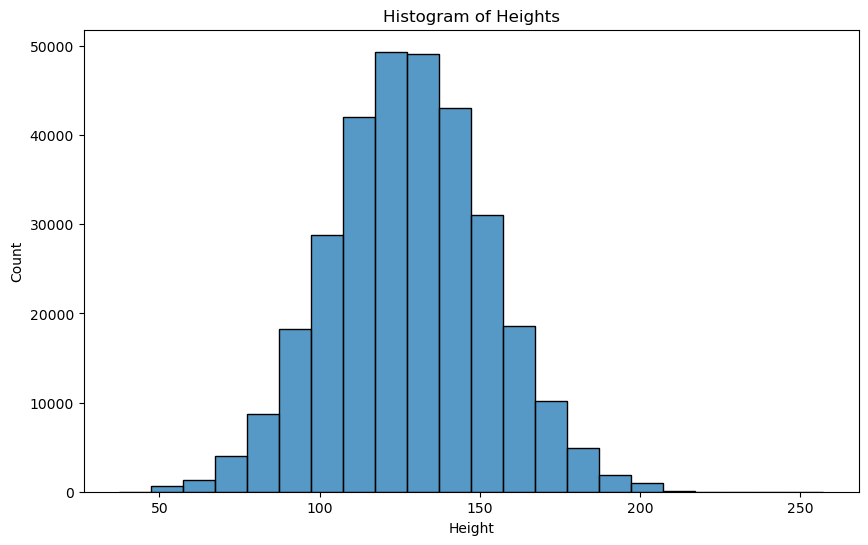

In [46]:
data = train_df['Height']
skewness = skew(data)
print(f'Skewness: {skewness}')
bins = np.arange(data.min() - 1, data.max() + 10, 10)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, bins=bins)
plt.title('Histogram of Heights')
plt.show()


### Model Devlopment

#### Creating Image Data Generators

In [47]:
train_generator = ImageDataGenerator(rescale=1./255)
vali_generator = ImageDataGenerator(rescale=1./255)
test_generator  = ImageDataGenerator(rescale=1./255)


#### Loading Image from Dataframe

In [49]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="Height",
    batch_size=32,
    seed=42,
    shuffle=True,
    color_mode="rgb",
    class_mode="raw",
    target_size=(256,256)
)

Validation_images = vali_generator.flow_from_dataframe(
    dataframe=Validation_df,
    x_col="image_path",
    y_col="Height",
    batch_size=32,
    seed=42,
    shuffle=True,
    color_mode="rgb",
    class_mode="raw",
    target_size=(256,256)
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col="image_path",
    y_col="Height",
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    class_mode="raw",
    target_size=(256,256)
)

Found 313068 validated image filenames.
Found 3549 validated image filenames.
Found 4436 validated image filenames.


#### Preview of Images

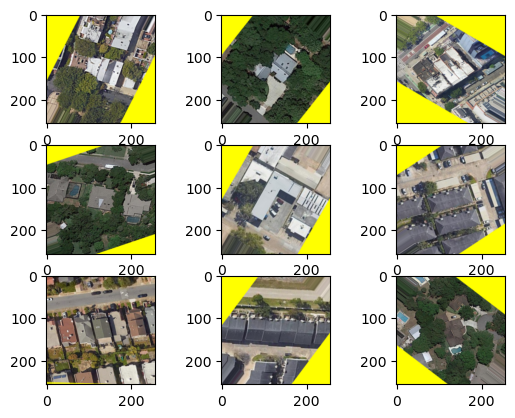

In [50]:
images, _ = next(train_images)
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i])
plt.show()

#### Defining Model Arcitecture

In [51]:
inputs = tf.keras.Input(shape=(256,256,3))
x = tf.keras.layers.Conv2D(8, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

#### Explaining the model architecture 

In [52]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        18496 

### Model Training

#### Training the Model

In [53]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics=[R2Score()]
)

history = model.fit(
    train_images,
    validation_data = Validation_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=6,
            verbose=1,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
9784/9784 [==============================] - 7971s 814ms/step - loss: 459.2193 - r2_score: 0.2484 - val_loss: 350.8747 - val_r2_score: 0.3739
Epoch 2/100
9784/9784 [==============================] - 7943s 812ms/step - loss: 372.1728 - r2_score: 0.3909 - val_loss: 304.4594 - val_r2_score: 0.4567
Epoch 3/100
9784/9784 [==============================] - 7876s 805ms/step - loss: 340.1881 - r2_score: 0.4431 - val_loss: 300.4065 - val_r2_score: 0.4639
Epoch 4/100
9784/9784 [==============================] - 7807s 798ms/step - loss: 320.3306 - r2_score: 0.4757 - val_loss: 343.3023 - val_r2_score: 0.3874
Epoch 5/100
9784/9784 [==============================] - 7887s 806ms/step - loss: 309.5504 - r2_score: 0.4934 - val_loss: 295.3701 - val_r2_score: 0.4729
Epoch 6/100
9784/9784 [==============================] - 7914s 809ms/step - loss: 299.4391 - r2_score: 0.5099 - val_loss: 270.1685 - val_r2_score: 0.5179
Epoch 7/100
9784/9784 [==============================] - 7858s 803ms/step - 

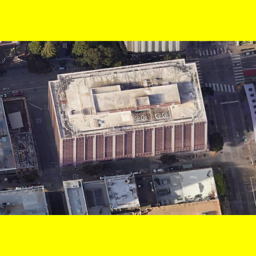

In [54]:
image = Image.open('final_imgs/IMG-1046439.png')
image

1/1 [==============================] - 0s 105ms/step
Feature maps for layer: conv2d_1


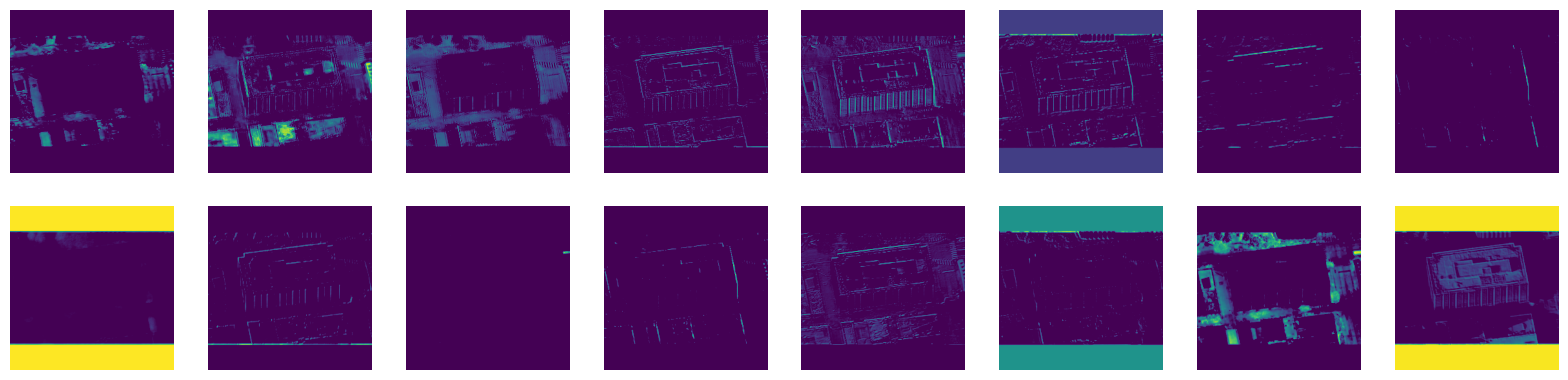

Feature maps for layer: max_pooling2d_1


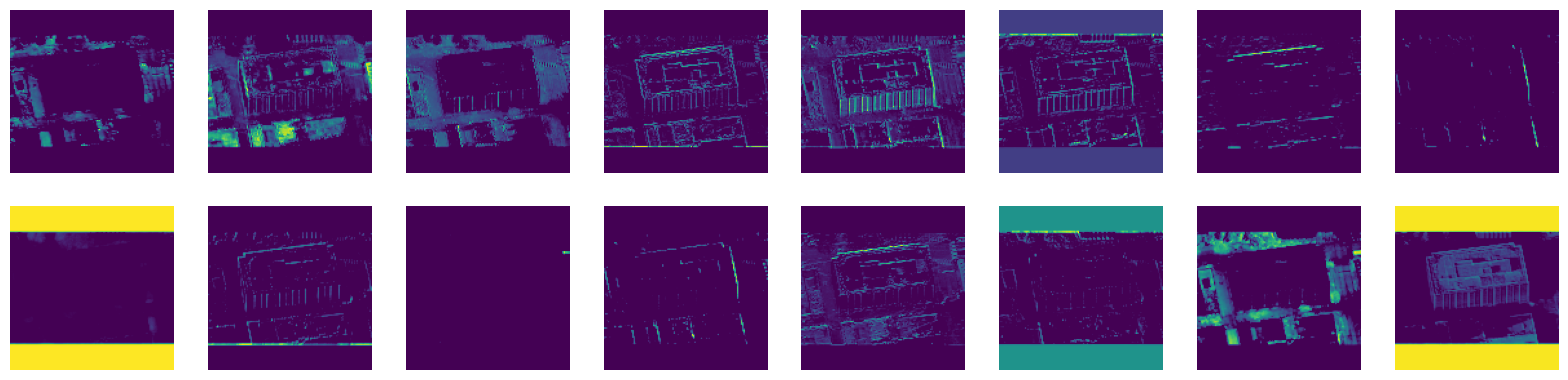

Feature maps for layer: conv2d_2


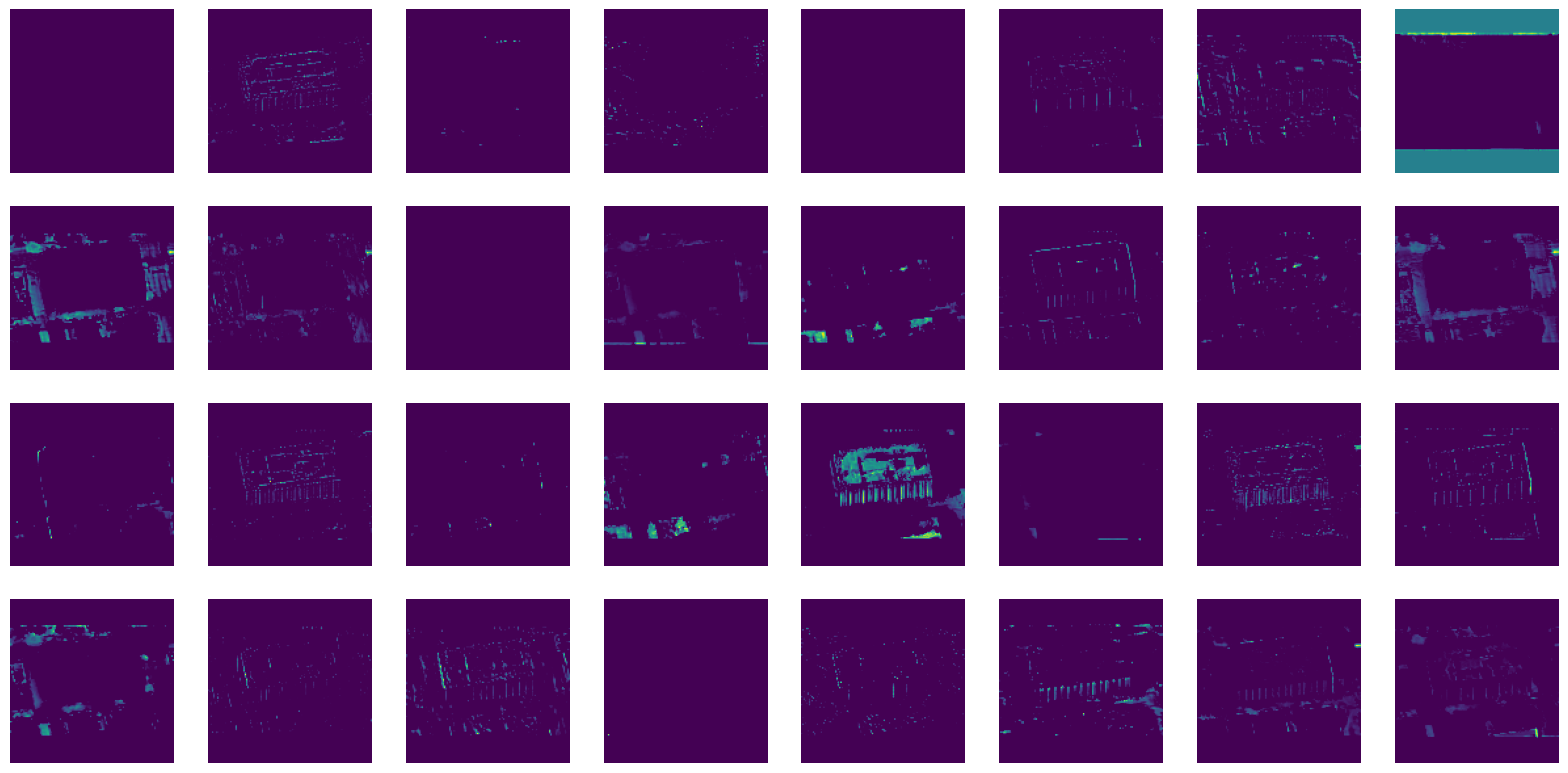

Feature maps for layer: max_pooling2d_2


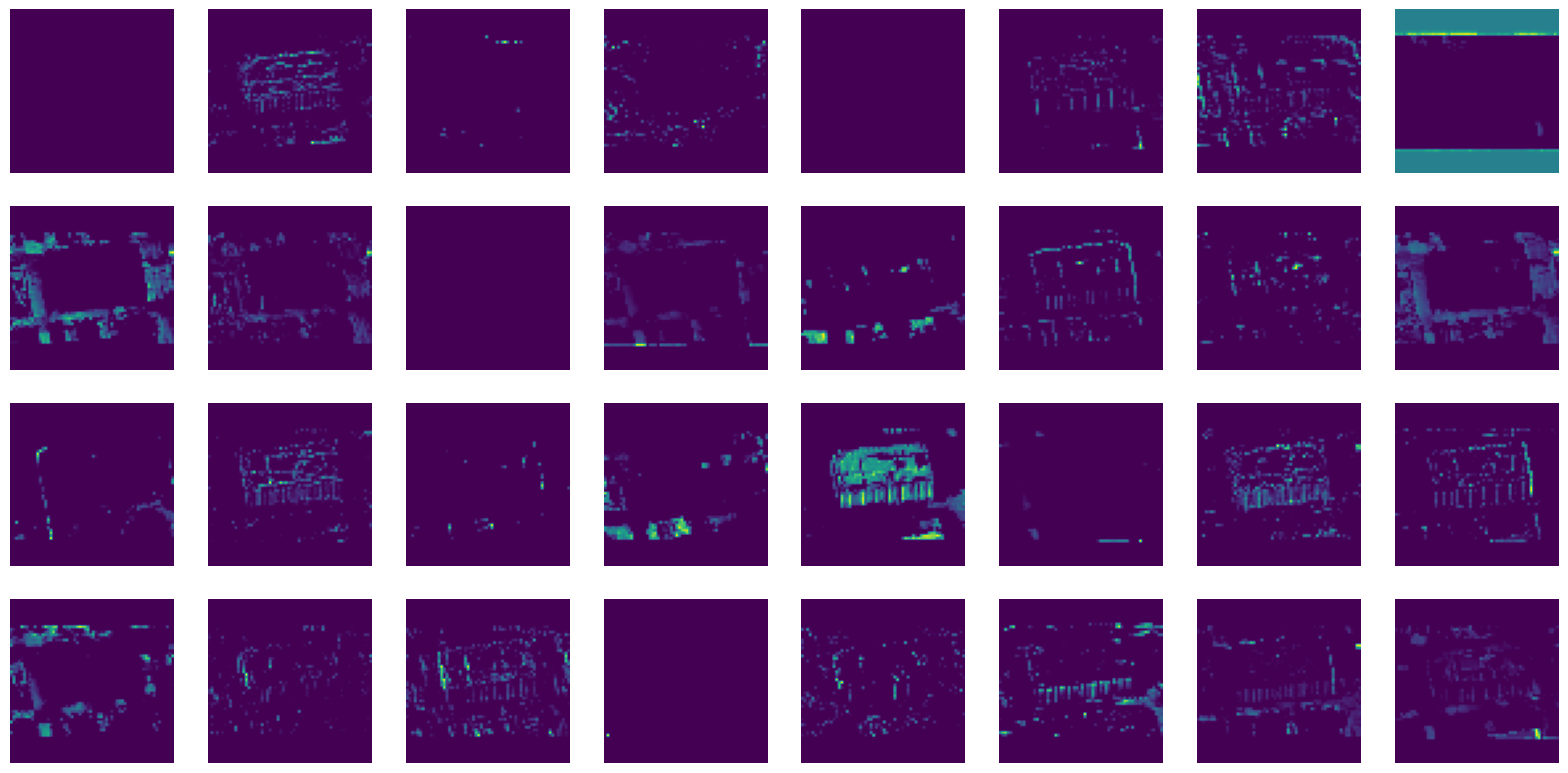

Feature maps for layer: conv2d_3


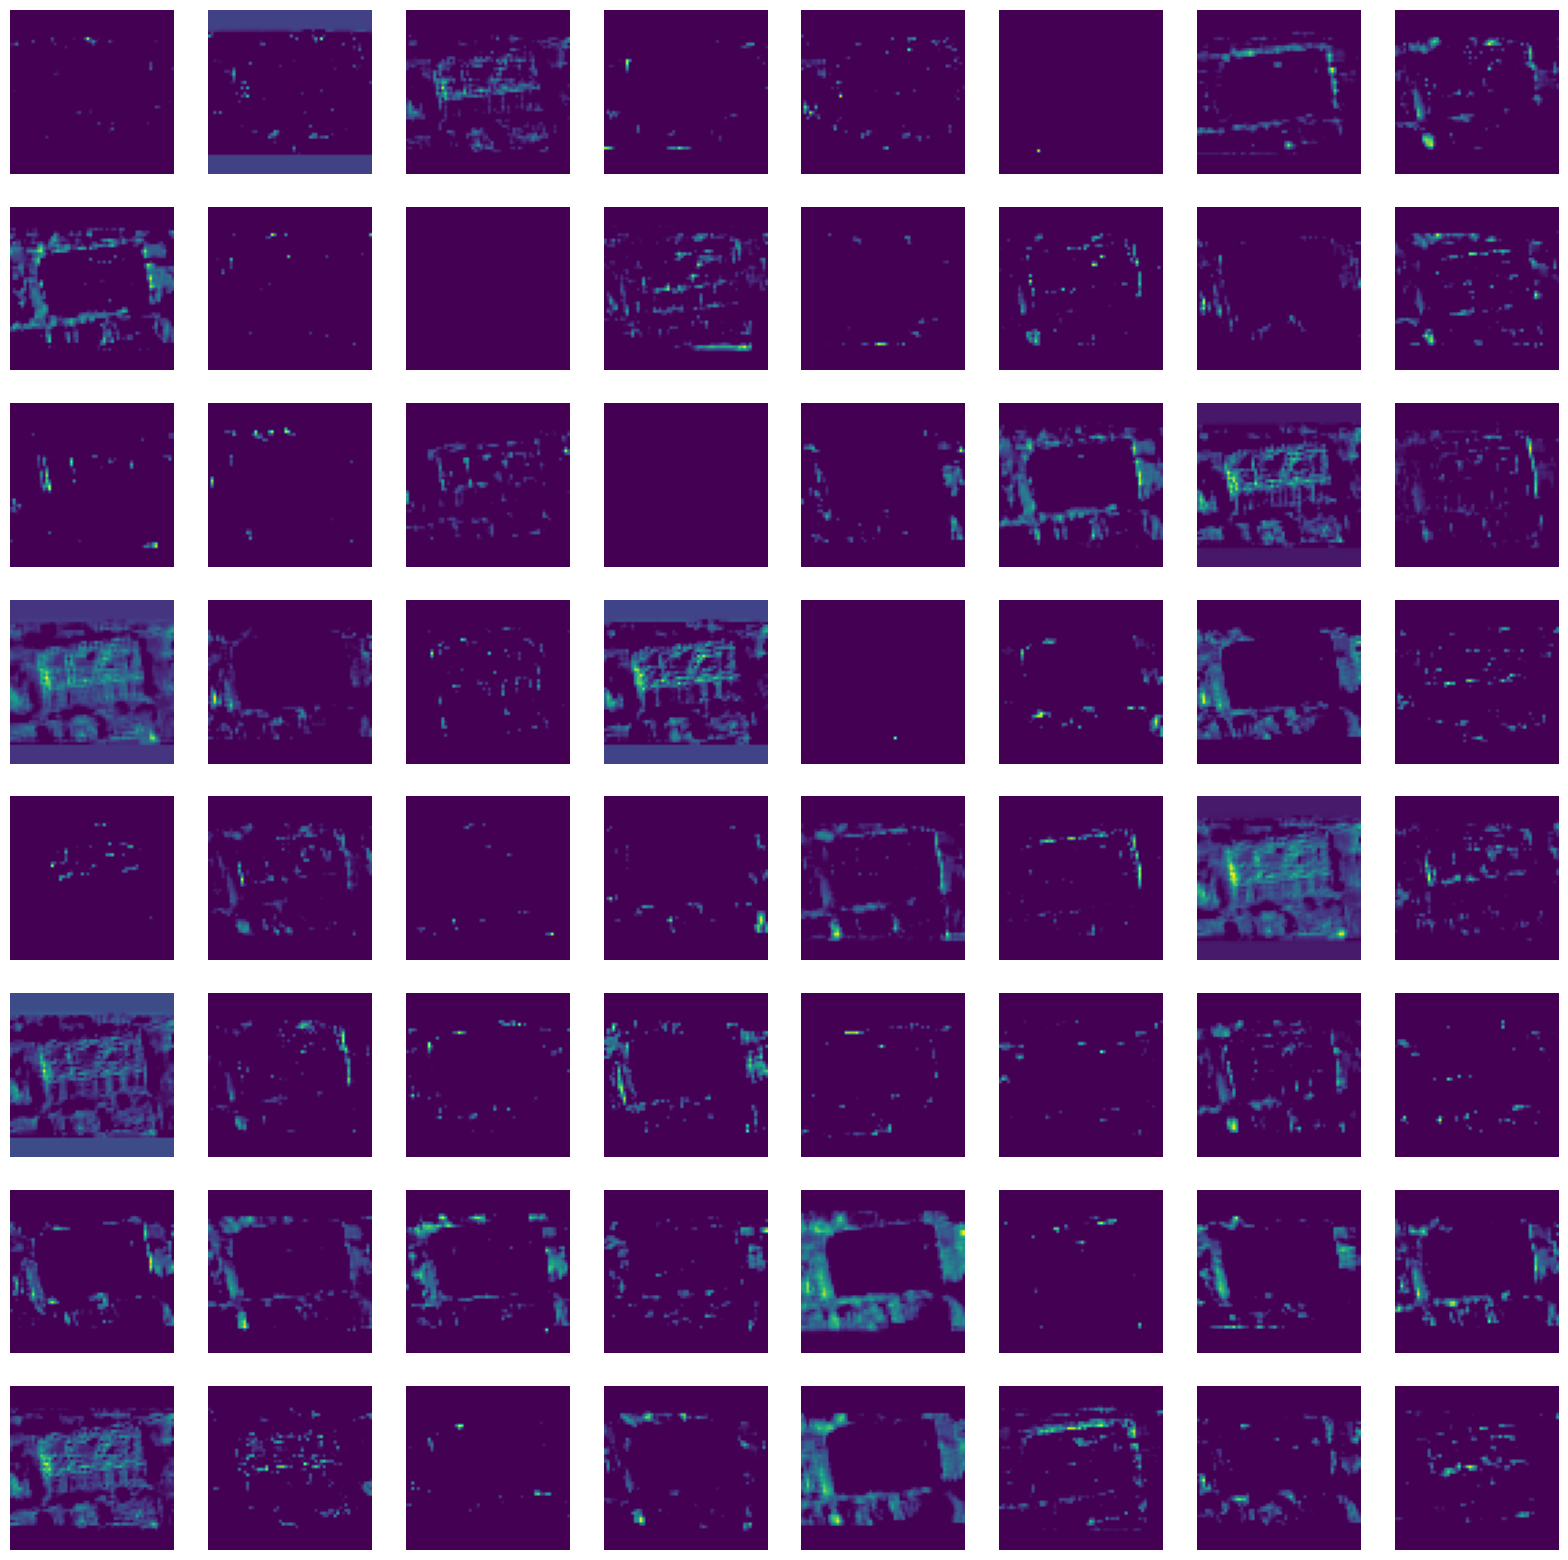

Feature maps for layer: max_pooling2d_3


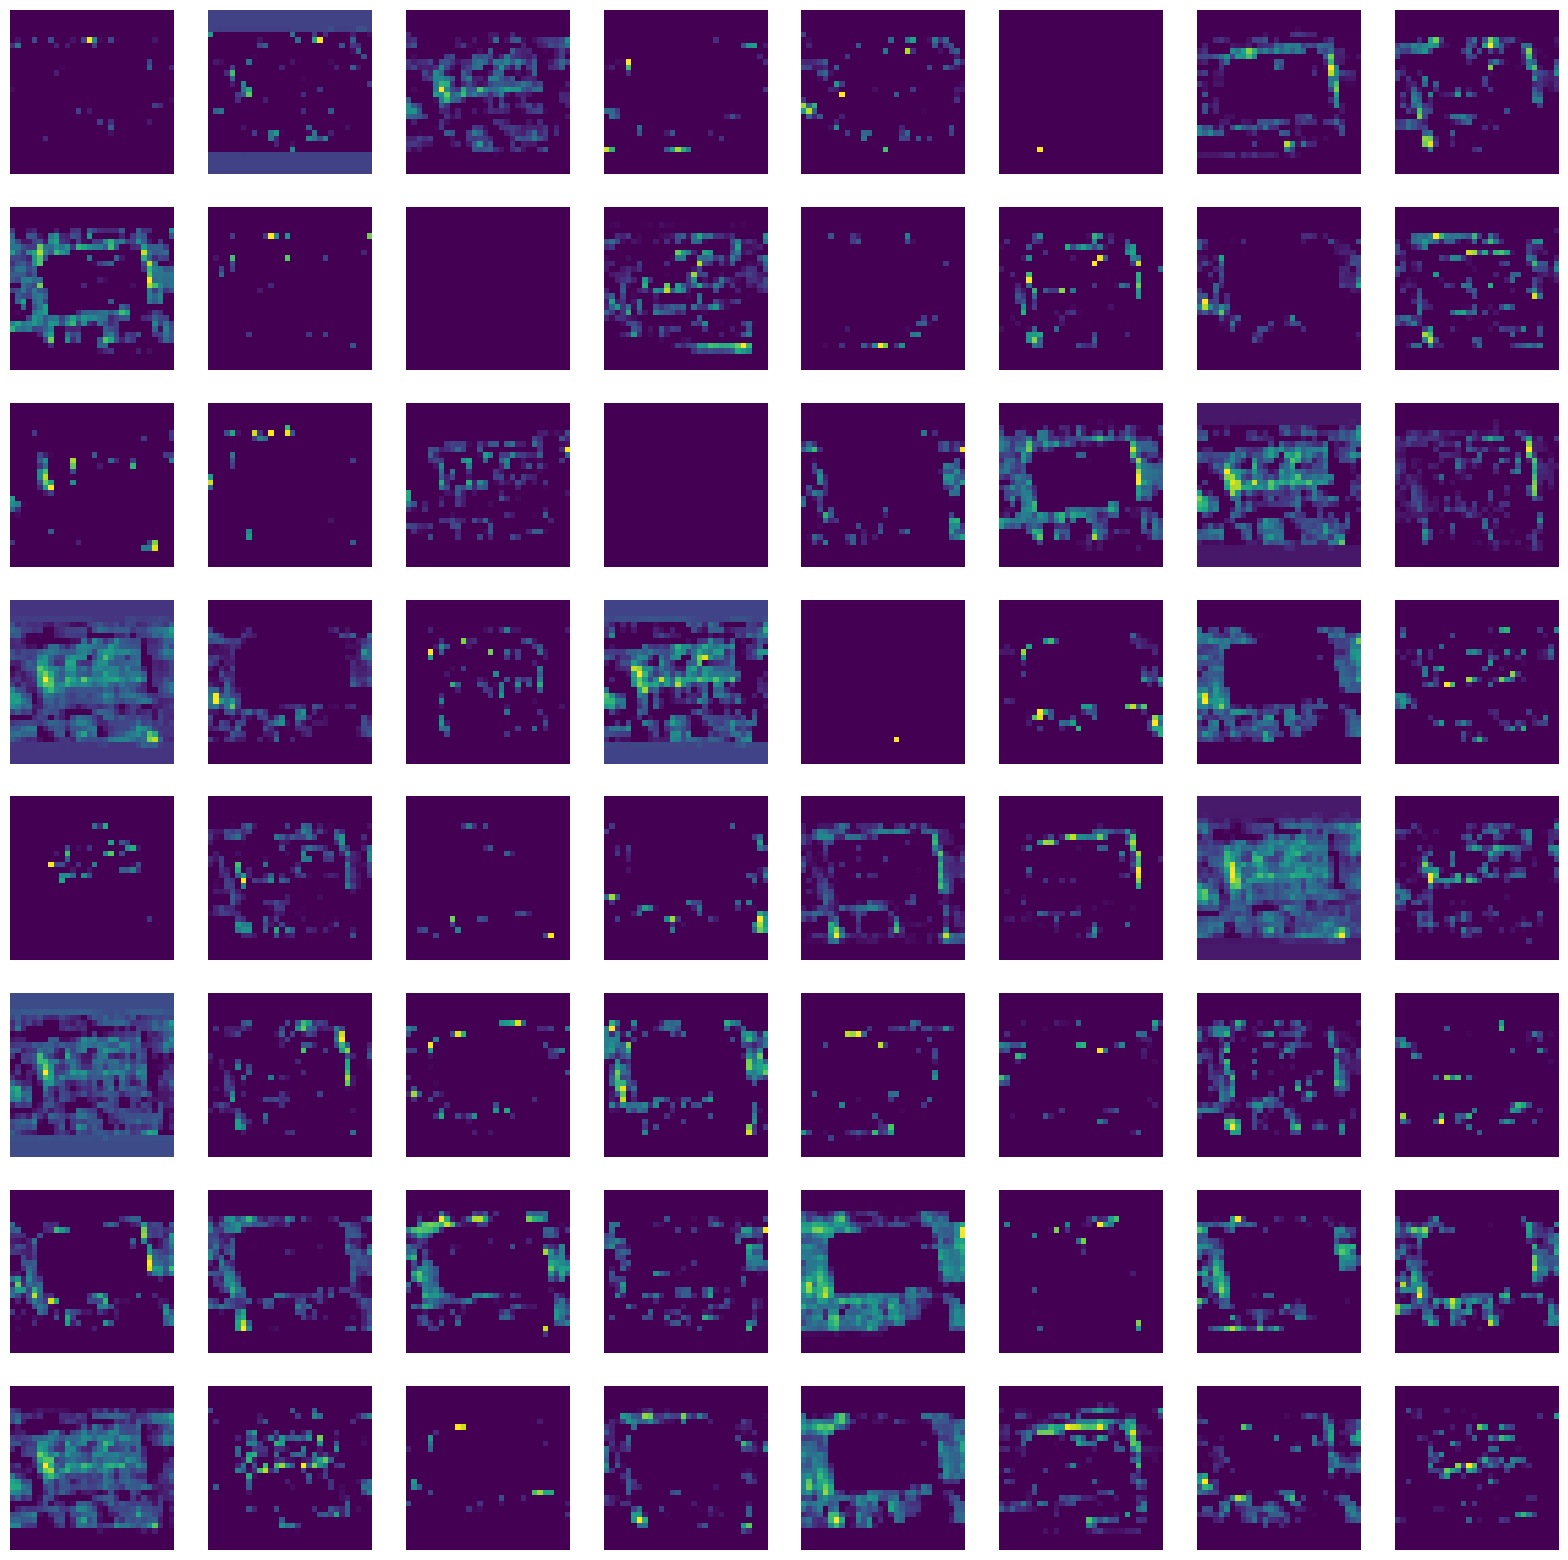

Feature maps for layer: conv2d_4


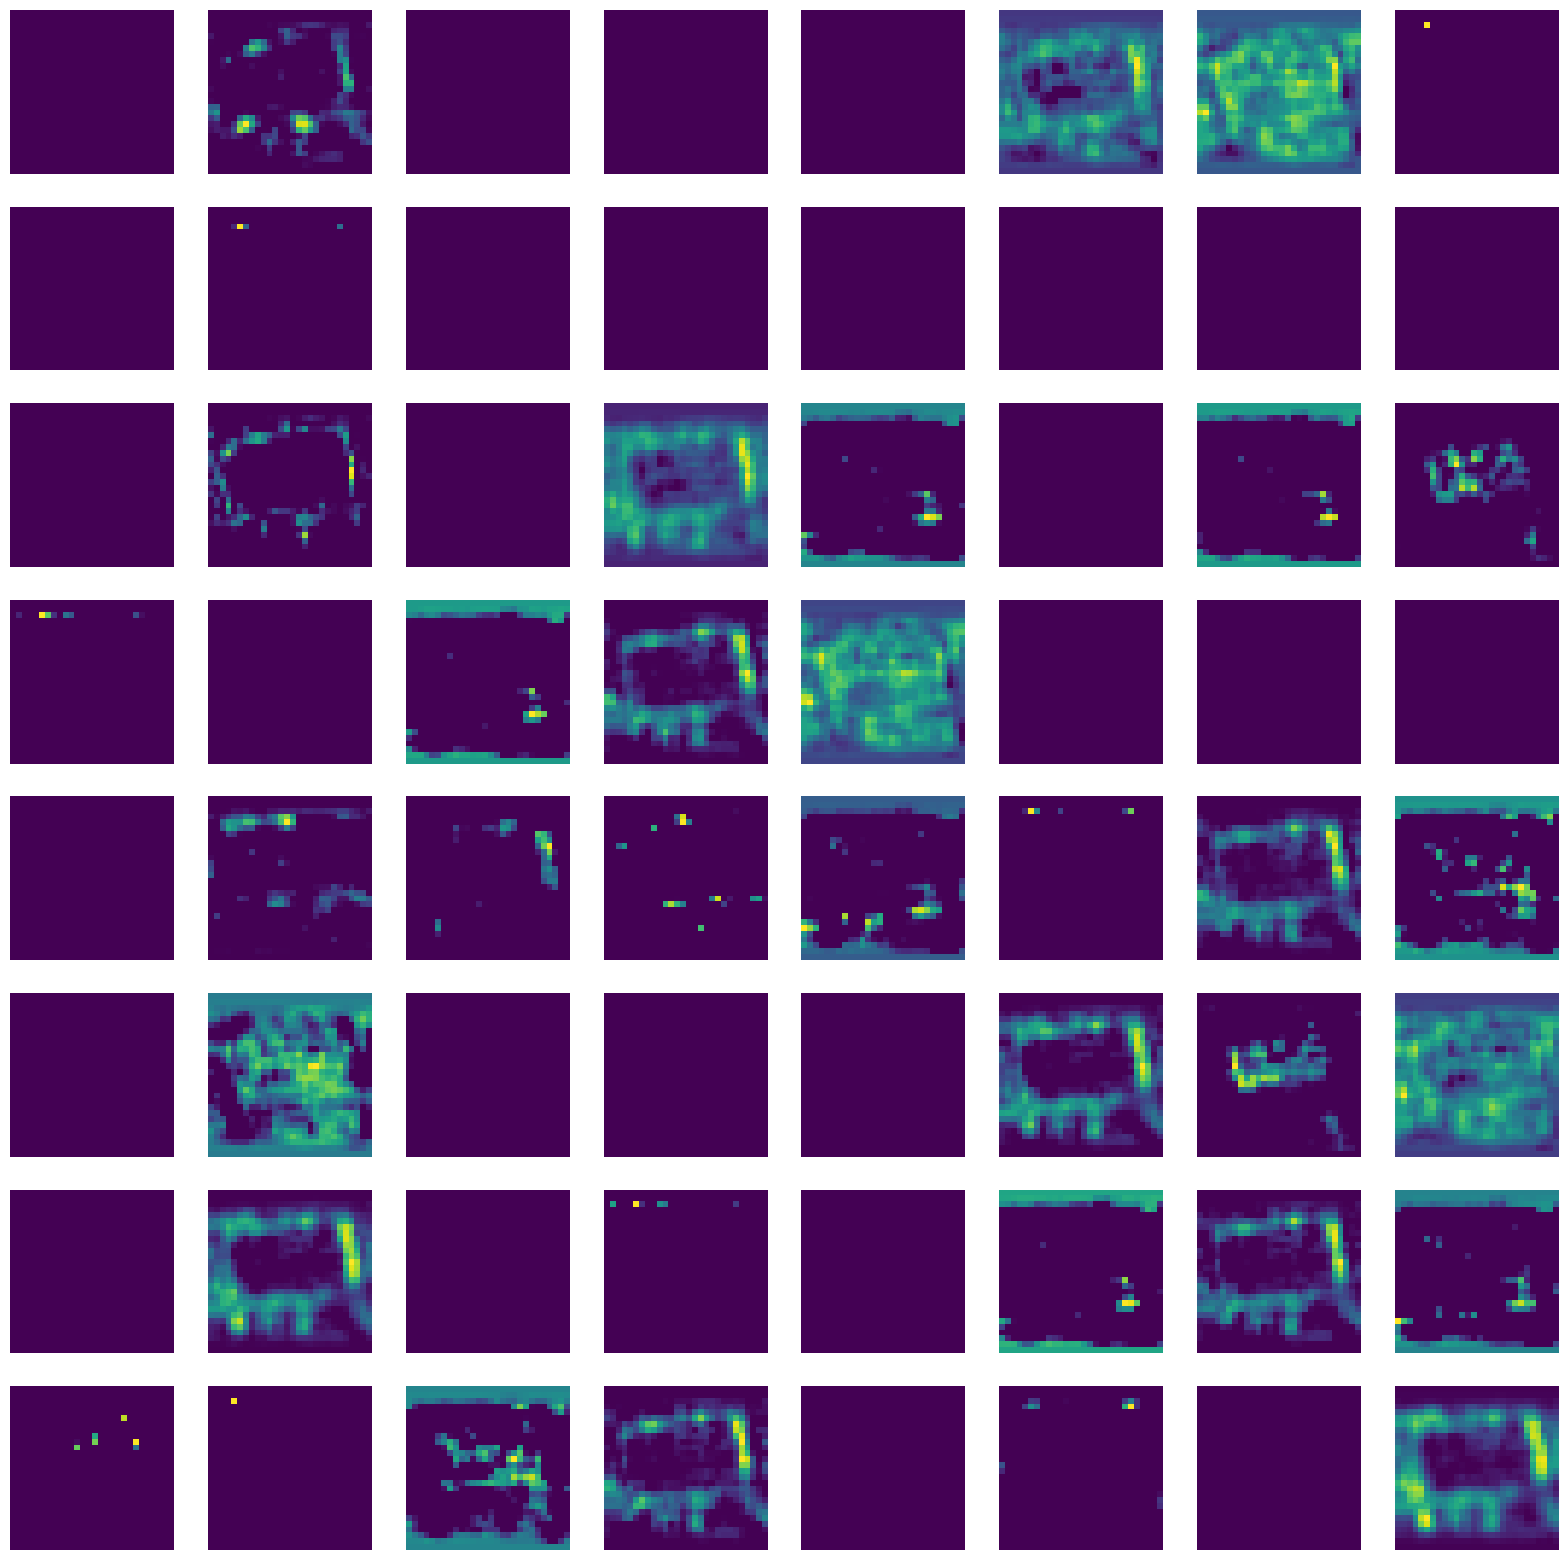

Feature maps for layer: max_pooling2d_4


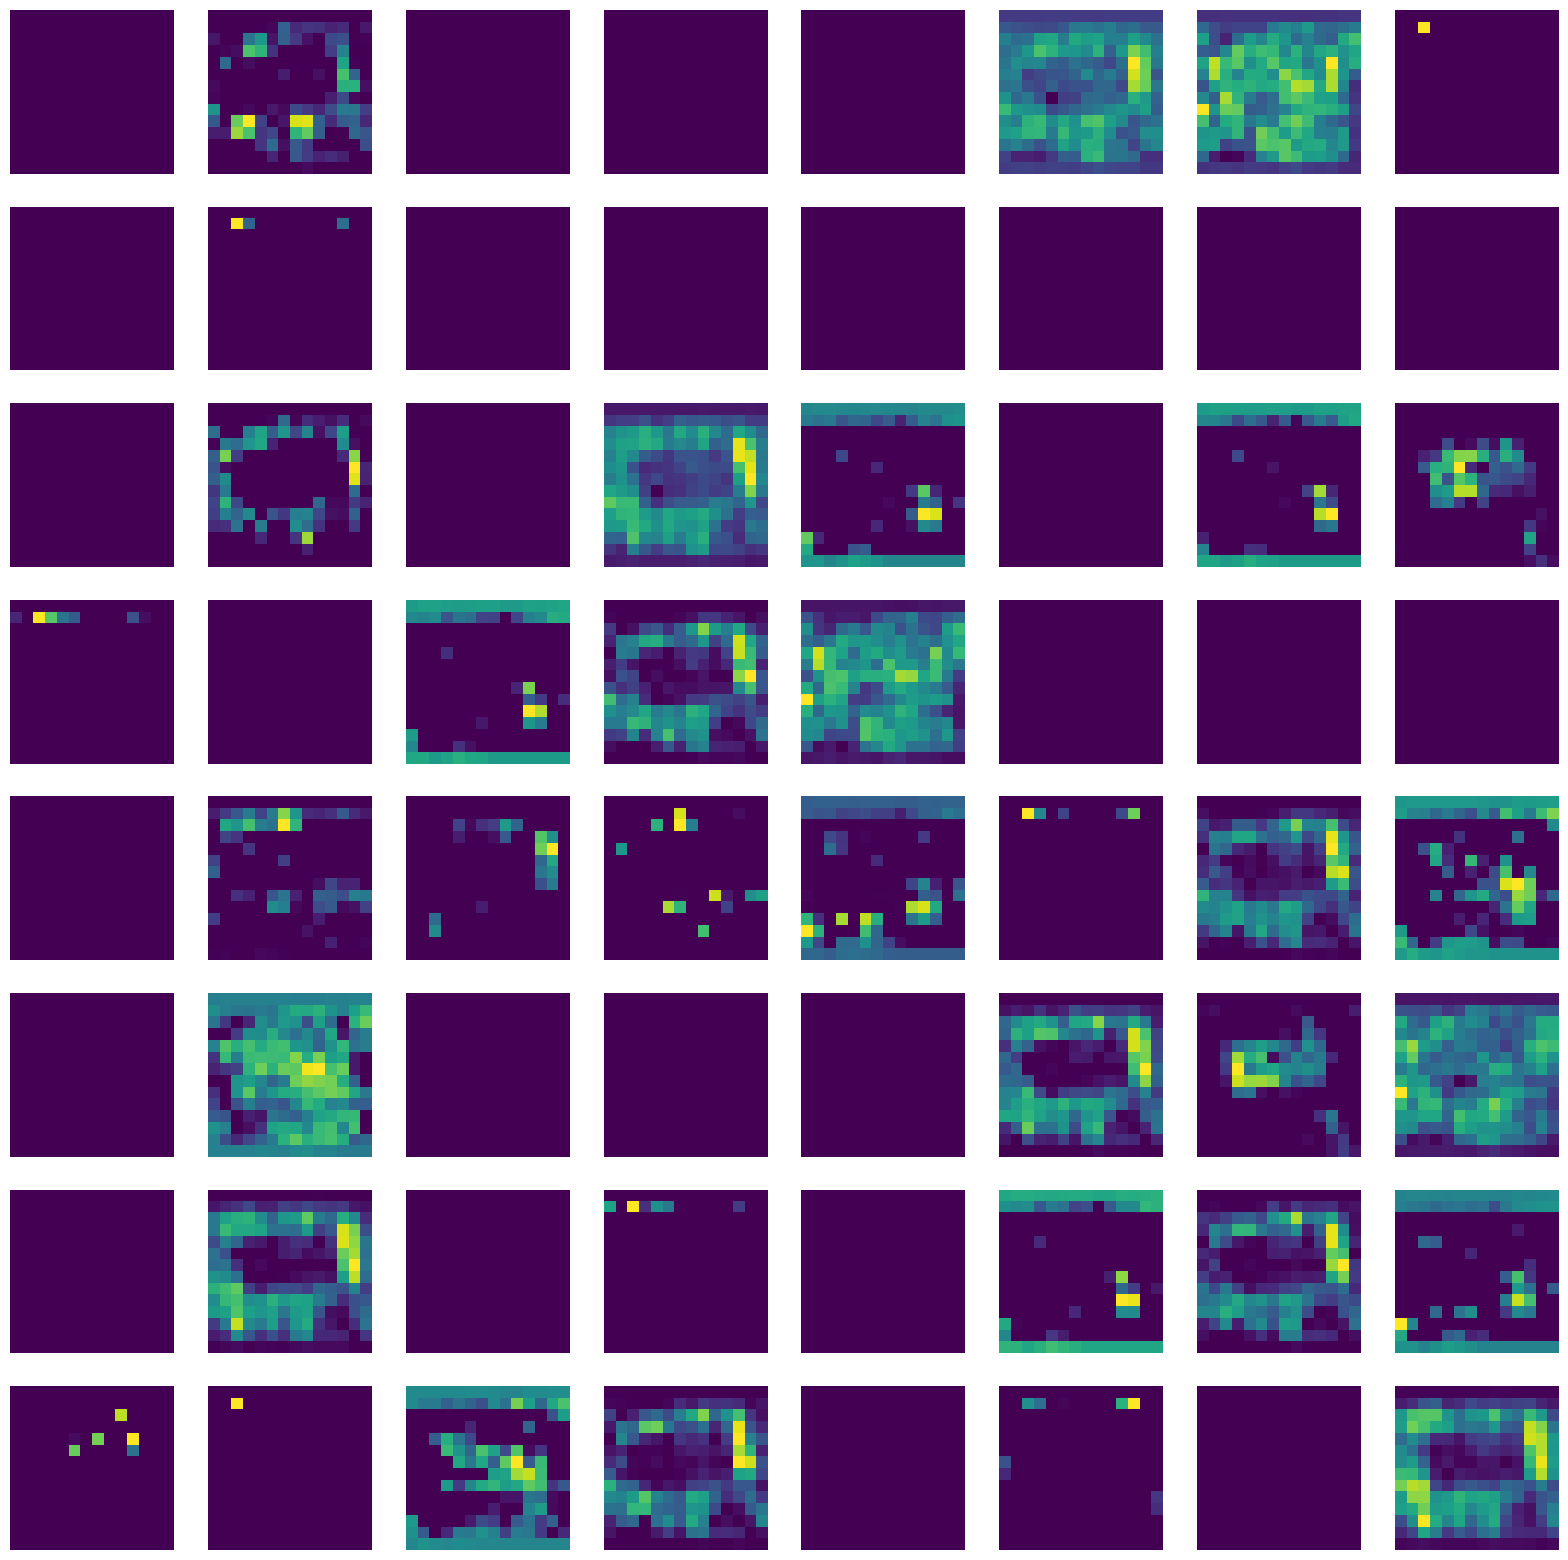

Feature maps for layer: global_average_pooling2d
The feature map for this layer is not 4-dimensional, so it cannot be plotted as an image.


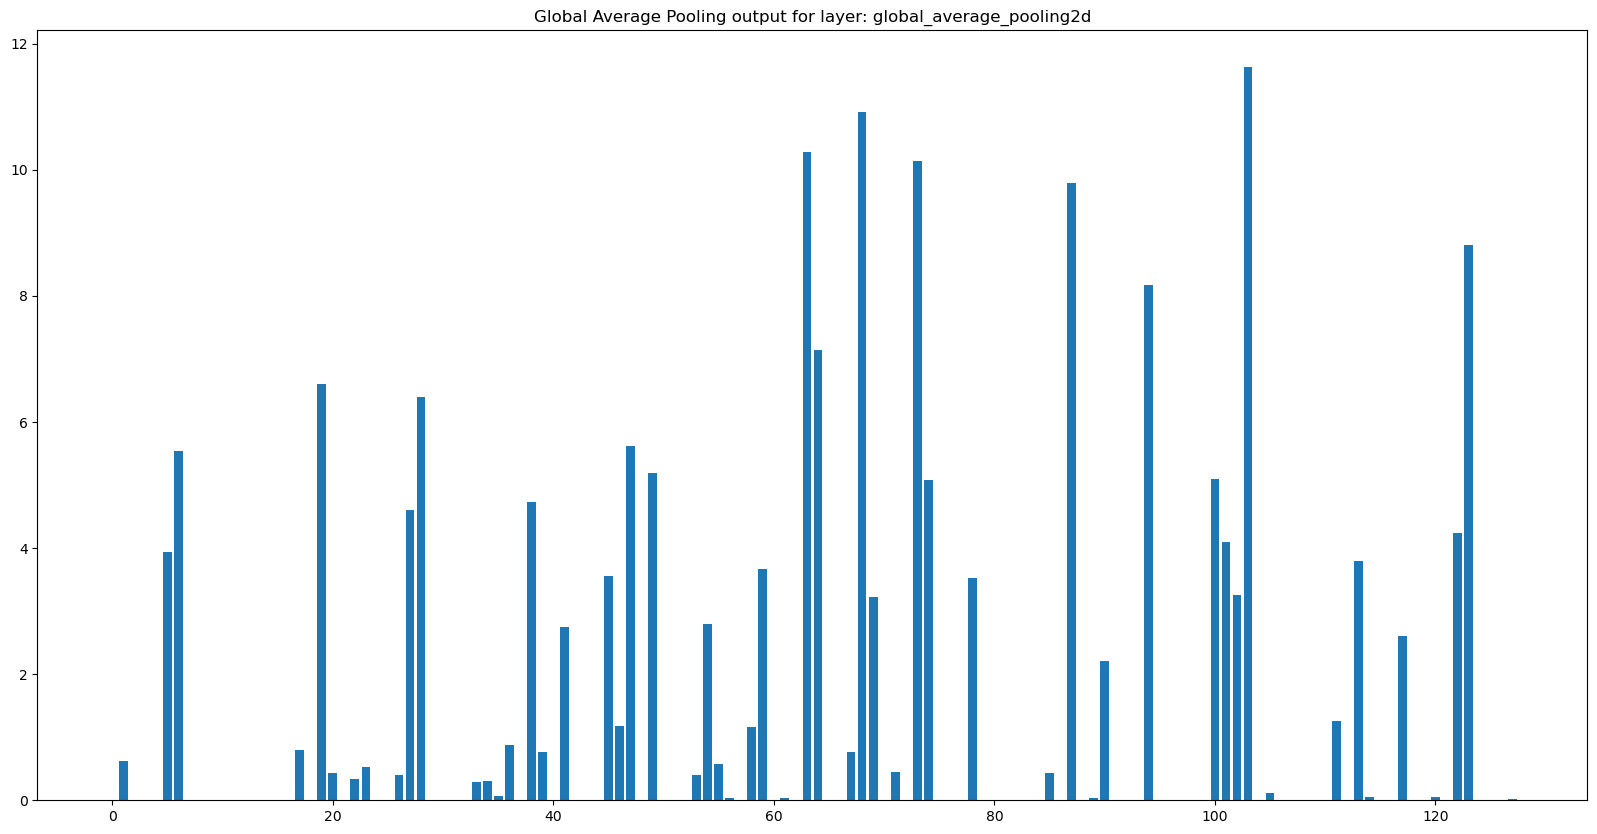

In [81]:
image = Image.open('final_imgs/IMG-1046439.png')
image = np.array(image) / 255.0;
image = np.expand_dims(image, axis=0)
image = tf.convert_to_tensor(image)
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pooling' in layer.name]
layer_outputs = [model.get_layer(name).output for name in layer_names]
feature_model = tf.keras.Model(inputs=model.inputs, outputs=layer_outputs)
feature_maps = feature_model.predict(image)
for layer_name, fmap in zip(layer_names, feature_maps):
    print(f"Feature maps for layer: {layer_name}")
    if len(fmap.shape) == 4:
        plt.figure(figsize=(20, 20))
        for i in range(min(64, fmap.shape[-1])):
            plt.subplot(8, 8, i+1)
            plt.imshow(fmap[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.show()
    else:
        print("The feature map for this layer is not 4-dimensional, so it cannot be plotted as an image.")
        if len(fmap.shape) == 2:
            if 'dense' in layer_name:
                plt.figure(figsize=(20, 10))
                plt.bar(range(fmap.shape[1]), fmap[0])
                plt.title(f"Dense layer output for layer: {layer_name}")
                plt.show()
            else:
                plt.figure(figsize=(20, 10))
                plt.bar(range(fmap.shape[1]), fmap[0])
                plt.title(f"Global Average Pooling output for layer: {layer_name}")
                plt.show()


#### Checking Loss and Validation loss to make sure the model is not overfitting

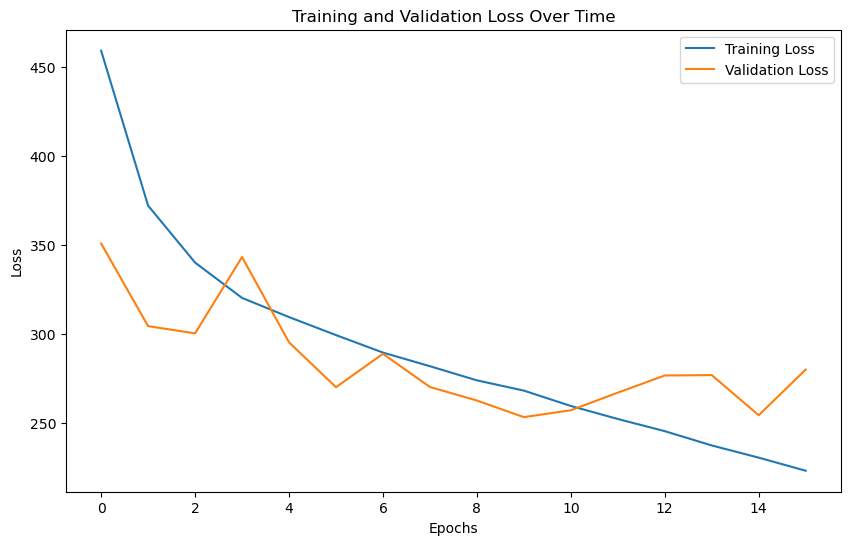

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Checking Model Accuracy over time 

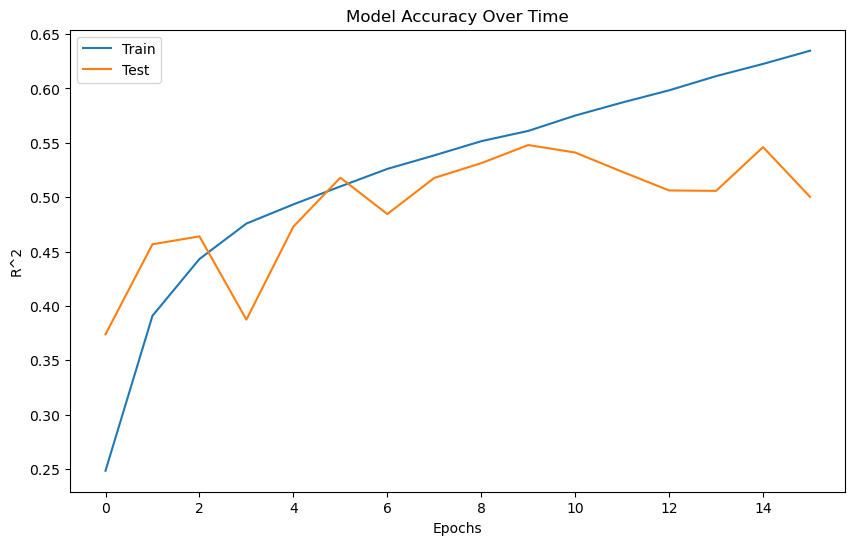

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Train')
plt.plot(history.history['val_r2_score'], label='Test')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()
plt.show()


### Model Testing

#### Testing The Model

In [58]:
predicted_heights = np.squeeze(model.predict(test_images))
true_heights = test_images.labels

predicted_heights = scaler.inverse_transform(predicted_heights.reshape(-1, 1))
predicted_heights = quantile_transformer.inverse_transform(predicted_heights)
true_heights = scaler.inverse_transform(true_heights.reshape(-1, 1))
true_heights = quantile_transformer.inverse_transform(true_heights)

mse = mean_squared_error(true_heights, predicted_heights)
rmse = np.sqrt(mse)

print("Test RMSE = {:.5f}".format(rmse))

r2 = r2_score(true_heights, predicted_heights)

print("Test R^2 = {:.5f}".format(r2))


139/139 [==============================] - 94s 679ms/step
Test RMSE = 16.81130
Test R^2 = 0.60320


C:\Users\rauni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
C:\Users\rauni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


#### Checking Distribution of Errors

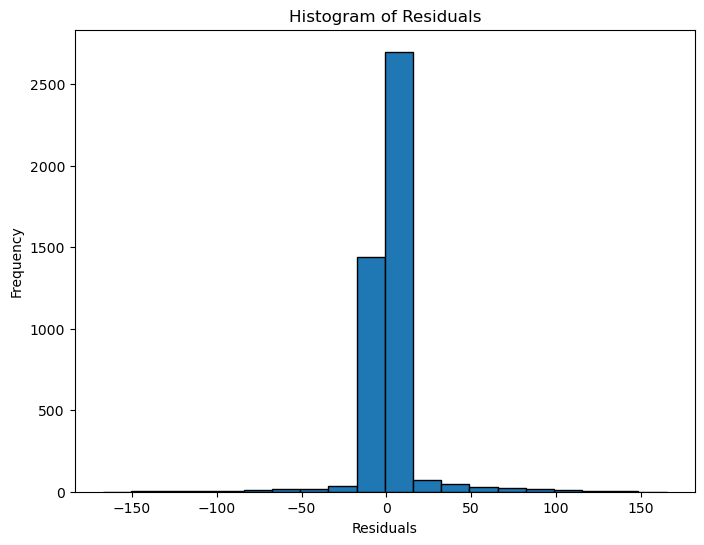

In [59]:
errors = true_heights - predicted_heights
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [74]:
def count_predictions(actual_values, predicted_values):
    correct_count = 0
    overestimated_count = 0
    underestimated_count = 0

    for actual, predicted in zip(actual_values, predicted_values):
        if abs(actual - predicted) <= 3:
            correct_count += 1
        elif actual < predicted:
            overestimated_count += 1
        else:
            underestimated_count += 1

    return correct_count, overestimated_count, underestimated_count

correct_count, overestimated_count, underestimated_count = count_predictions(true_heights, 
                                                                             predicted_heights)

print(f"Correctly predicted count: {correct_count}")
print(f"Overestimated count: {overestimated_count}")
print(f"Underestimated count: {underestimated_count}")


Correctly predicted count: 2765
Overestimated count: 658
Underestimated count: 1013


In [79]:
import pandas as pd

def count_prediction_errors(actual_values, predicted_values):
    error_counts = {}

    for actual, predicted in zip(actual_values, predicted_values):
        error = abs(actual - predicted)
        error_range = f"{(error//3)*3}-{((error//3)+1)*3}"

        if error_range in error_counts:
            error_counts[error_range] += 1
        else:
            error_counts[error_range] = 1

    return error_counts

error_counts = count_prediction_errors(true_heights, predicted_heights)

# Sort the error ranges before printing
sorted_error_counts = sorted(error_counts.items(), key=lambda x: float(x[0].split('-')[0]))

# Convert the sorted error counts to a pandas DataFrame and display it
edf = pd.DataFrame(sorted_error_counts, columns=["Error Range", "Count"])
edf


,Error Range,Count
0,0.0-3.0,2765
1,3.0-6.0,945
2,6.0-9.0,256
3,9.0-12.0,99
4,12.0-15.0,56
5,15.0-18.0,27
6,18.0-21.0,30
7,21.0-24.0,14
8,24.0-27.0,18
9,27.0-30.0,16


### Checking Prediction Error

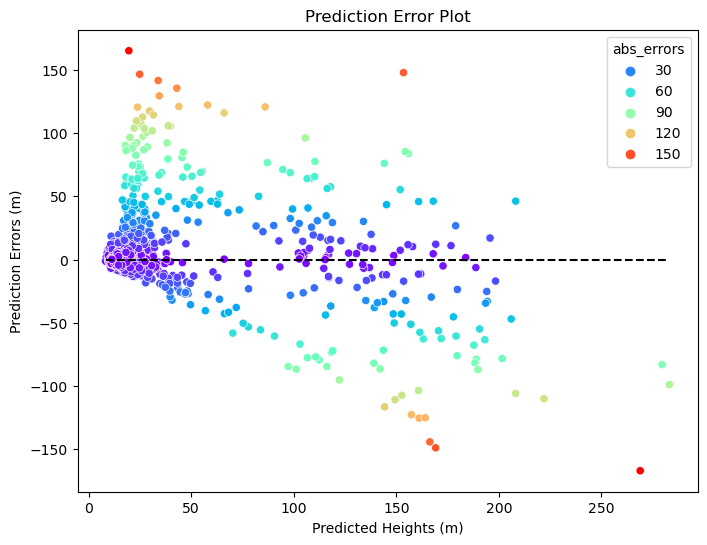

In [61]:
abs_errors = np.squeeze(abs(errors))
predicted_heights = np.squeeze(predicted_heights)
errors = np.squeeze(errors)

pe = pd.DataFrame({
    'Predicted Heights (m)': predicted_heights,
    'Prediction Errors (m)': errors,
    'abs_errors': abs_errors
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Predicted Heights (m)', y='Prediction Errors (m)', hue='abs_errors', palette='rainbow', data=pe)
plt.title('Prediction Error Plot')
plt.hlines(0, predicted_heights.min(), predicted_heights.max(), colors='k', linestyles='dashed')

plt.show()


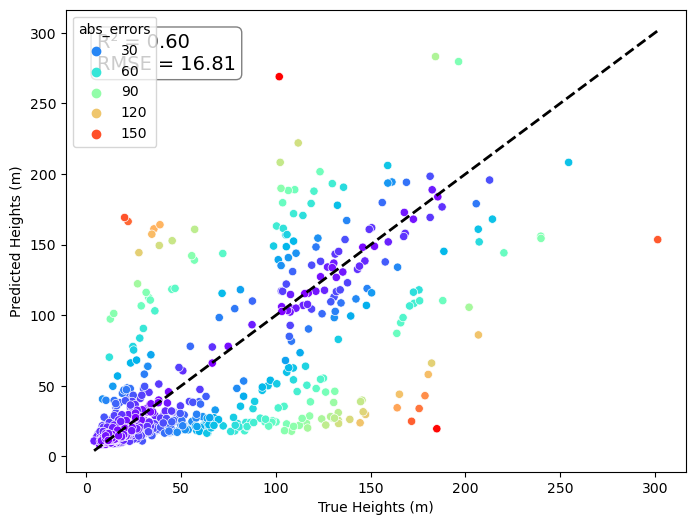

In [62]:
abs_errors = np.squeeze(abs(errors))
predicted_heights = np.squeeze(predicted_heights)
true_heights = np.squeeze(true_heights)

cg = pd.DataFrame({
    'True Heights (m)': true_heights,
    'Predicted Heights (m)': predicted_heights,
    'abs_errors': abs_errors
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='True Heights (m)', y='Predicted Heights (m)', hue='abs_errors', palette='rainbow', data=cg)

plt.plot([true_heights.min(), true_heights.max()], [true_heights.min(), true_heights.max()], 'k--', lw=2)

plt.xlabel('True Heights (m)')
plt.ylabel('Predicted Heights (m)')
textstr = f'R² = {r2:.2f}\nRMSE = {rmse:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()
